# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Aisyah Wardah Firdiyyah]
- **Email:** [aisyahfirdiyyah@gmail.com]
- **ID Dicoding:** [aisyahfirdiyyah
]

## Menentukan Pertanyaan Bisnis

- Bagaimana penyewaan sepeda berdasarkan musim dan cuaca?
-Pada hari apa jumlah penyewaan sepeda mencapai puncaknya berdasarkan waktu (hari dalam seminggu)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

Dataset Day

In [3]:
df_day = pd.read_csv("/content/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Dataset Hour

In [4]:
df_hour = pd.read_csv("/content/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data


Menilai tabel Day

In [5]:

print(df_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [6]:
print(df_day.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai tabel Hour

In [9]:
print(df_hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [10]:
print(df_hour.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [11]:
print("Jumlah duplikasi: ", df_hour.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Setelah melakukan tahap Data Wrangling, tahap cleaning data tidak perlu dilakukan karena kedua data tersebut tidak memiliki kesalahan.

In [13]:
print("Season (day.csv):", df_day['season'].unique())
print("Month (day.csv):", df_day['mnth'].unique())
print("Weather (day.csv):", df_day['weathersit'].unique())

Season (day.csv): [1 2 3 4]
Month (day.csv): [ 1  2  3  4  5  6  7  8  9 10 11 12]
Weather (day.csv): [2 1 3]


In [14]:
print("Season (hour.csv):", df_hour['season'].unique())
print("Hour (hour.csv):", df_hour['hr'].unique())
print("Weather (hour.csv):", df_hour['weathersit'].unique())

Season (hour.csv): [1 2 3 4]
Hour (hour.csv): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Weather (hour.csv): [1 2 3 4]


In [15]:
print("Jumlah nilai unik di dataset day.csv:")
print(df_day.nunique())


Jumlah nilai unik di dataset day.csv:
instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


In [16]:
print("\nJumlah nilai unik di dataset hour.csv:")
print(df_hour.nunique())


Jumlah nilai unik di dataset hour.csv:
instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64


### Memperbaiki Data Tabel

Data Day

In [17]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Data Hour

In [18]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [19]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

In [20]:
df_day.info()
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Data df_day

In [21]:
df_day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
375,376,2012-01-11,1,1,1,0,3,1,2,0.274167,0.282821,0.847500,0.131221,92,2085,2177
81,82,2011-03-23,2,0,3,0,3,1,2,0.346957,0.337939,0.839565,0.234261,203,1918,2121
645,646,2012-10-07,4,1,10,0,0,0,2,0.415833,0.419813,0.708333,0.141162,781,2729,3510
201,202,2011-07-21,3,0,7,0,4,1,2,0.815000,0.826371,0.691250,0.222021,632,3152,3784
436,437,2012-03-12,1,1,3,0,1,1,1,0.466667,0.459592,0.489167,0.207713,838,4460,5298


In [22]:
df_day.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [23]:
df_day.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [24]:
day_stats = df_day['cnt'].describe()
print(day_stats)


count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


In [25]:
corr = df_day.corr()
print(corr['cnt'])

instant       0.628830
dteday        0.628830
season        0.406100
yr            0.566710
mnth          0.279977
holiday      -0.068348
weekday       0.067443
workingday    0.061156
weathersit   -0.297391
temp          0.627494
atemp         0.631066
hum          -0.100659
windspeed    -0.234545
casual        0.672804
registered    0.945517
cnt           1.000000
Name: cnt, dtype: float64


#### Statistik deskriptif untuk jumlah sepeda yang disewa berdasarkan musim dan cuaca

In [26]:
seasonal_stats = df_day.groupby('season')['cnt'].describe()
print(seasonal_stats)

        count         mean          std     min     25%     50%      75%  \
season                                                                     
1       181.0  2604.132597  1399.942119   431.0  1538.0  2209.0  3456.00   
2       184.0  4992.331522  1695.977235   795.0  4003.0  4941.5  6377.00   
3       188.0  5644.303191  1459.800381  1115.0  4586.5  5353.5  6929.25   
4       178.0  4728.162921  1699.615261    22.0  3615.5  4634.5  5624.50   

           max  
season          
1       7836.0  
2       8362.0  
3       8714.0  
4       8555.0  


In [27]:
weather_stats = df_day.groupby('weathersit')['cnt'].describe()

print(weather_stats)

            count         mean          std    min     25%     50%     75%  \
weathersit                                                                   
1           463.0  4876.786177  1879.483989  431.0  3636.5  4844.0  6458.5   
2           247.0  4035.862348  1809.109918  605.0  2674.5  4040.0  5257.5   
3            21.0  1803.285714  1240.284449   22.0   705.0  1817.0  2424.0   

               max  
weathersit          
1           8714.0  
2           8362.0  
3           4639.0  


#### Korelasi antara musim, cuaca, dan jumlah sepeda yang disewa

In [28]:
season_corr = df_day.groupby('season')['cnt'].corr(df_day['cnt'])
print(season_corr)

season
1    1.0
2    1.0
3    1.0
4    1.0
Name: cnt, dtype: float64


In [29]:
weather_corr = df_day.groupby('weathersit')['cnt'].corr(df_day['cnt'])
print(weather_corr)

weathersit
1    1.0
2    1.0
3    1.0
Name: cnt, dtype: float64


### Data df_hour

In [30]:
df_hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13067,13068,2012-07-03,3,1,7,16,0,2,1,2,0.90,0.7727,0.24,0.1940,90,437,527
4928,4929,2011-07-29,3,0,7,6,0,5,1,2,0.72,0.7121,0.84,0.0000,7,83,90
16279,16280,2012-11-16,4,1,11,1,0,5,1,2,0.30,0.3182,0.65,0.0896,5,16,21
16476,16477,2012-11-24,4,1,11,6,0,6,0,1,0.24,0.2121,0.44,0.2836,1,9,10
16825,16826,2012-12-08,4,1,12,20,0,6,0,2,0.36,0.3788,1.00,0.0000,20,162,182


In [31]:
df_hour.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [32]:
df_hour.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


#### Menghitung rata-rata jumlah sepeda yang disewa per jam

In [33]:
hourly_avg = df_hour.groupby('hr')['cnt'].mean()
print(hourly_avg)

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


In [34]:
hour_corr =df_hour.corr()
print(hour_corr['cnt'])

instant       0.278379
dteday        0.277753
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64


In [35]:
workingday_avg = df_hour[df_hour['workingday'] == 1].groupby('hr')['cnt'].mean()
print(workingday_avg)

hr
0      36.786290
1      16.552632
2       8.683778
3       4.942553
4       5.429787
5      24.913131
6     102.500000
7     290.612903
8     477.006048
9     241.518145
10    135.366935
11    158.229839
12    200.820926
13    198.429719
14    183.572289
15    201.331325
16    293.122244
17    525.290581
18    492.226908
19    348.401606
20    249.718876
21    186.287149
22    138.389558
23     88.708835
Name: cnt, dtype: float64


In [36]:
weekend_avg = df_hour[df_hour['workingday'] == 0].groupby('hr')['cnt'].mean()
print(weekend_avg)

hr
0      90.800000
1      69.508696
2      53.171053
3      25.775330
4       8.264317
5       8.689189
6      18.742358
7      43.406926
8     105.653680
9     171.623377
10    255.909091
11    315.316017
12    366.259740
13    372.731602
14    364.645022
15    358.813853
16    352.727273
17    323.549784
18    281.056522
19    231.673913
20    174.739130
21    142.060870
22    116.060870
23     85.930435
Name: cnt, dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1.  Bagimana pengaruh cuaca terhadap jumlah pengguna sepeda?

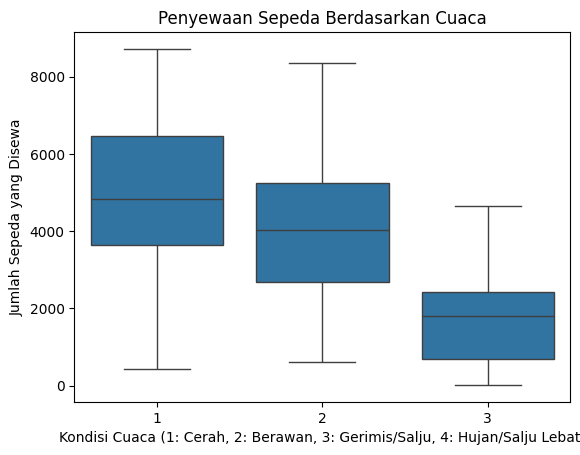

In [37]:
sns.boxplot(data=df_day, x='weathersit', y='cnt')
plt.title('Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Berawan, 3: Gerimis/Salju, 4: Hujan/Salju Lebat)')
plt.ylabel('Jumlah Sepeda yang Disewa')
plt.show()

### Pertanyaan 2: Bagaimana pola penggunaan sepeda berdasarkan waktu (hari dalam seminggu) ?

In [38]:
df_hour['day_of_week'] = pd.to_datetime(df_hour['dteday']).dt.dayofweek

In [39]:
usage_by_hour = df_hour.groupby('day_of_week')['cnt'].sum()

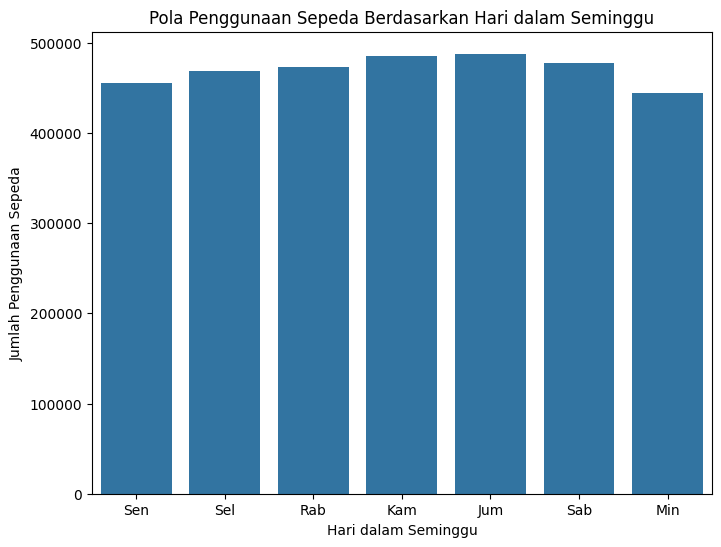

In [40]:
plt.figure(figsize=(8, 6))
sns.barplot(x=usage_by_hour.index, y=usage_by_hour.values)
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.title('Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xticks(ticks=range(7), labels=['Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab', 'Min'])
plt.show()

 ## Analisa Lanjutan > Clustering

In [ ]:
df_day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
387,388,2012-01-23,1,1,1,0,1,1,2,0.218333,0.243058,0.911250,0.110708,145,2287,2432
472,473,2012-04-17,2,1,4,0,2,1,1,0.608333,0.598487,0.390417,0.273629,989,5702,6691
72,73,2011-03-14,1,0,3,0,1,1,1,0.325217,0.332000,0.496957,0.136926,359,1687,2046
490,491,2012-05-05,2,1,5,0,6,0,2,0.621667,0.584608,0.756667,0.152992,2496,4387,6883
400,401,2012-02-05,1,1,2,0,0,0,2,0.265833,0.264521,0.687917,0.175996,318,2629,2947


### Mengelompokkan berdasarkan musim

In [41]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_day['season_label'] = df_day['season'].map(season_map)
df_hour['season_label'] = df_hour['season'].map(season_map)

### Mengelompokkan hari Kerja Vs Libur

In [42]:
workingday_map = {0: 'Non-Working Day', 1: 'Working Day'}
df_day['workingday_label'] = df_day['workingday'].map(workingday_map)
df_hour['workingday_label'] = df_hour['workingday'].map(workingday_map)

### Mengelompokkan dalam kategore (Binning)

In [43]:
def time_of_day(hour):
    if 0 <= hour < 6:
        return 'Midnight'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df_hour['time_category'] = df_hour['hr'].apply(time_of_day)


### Binning jumlah penyewaan (cnt)

In [44]:
def rental_category(cnt):
    if cnt < 100:
        return 'Low'
    elif 100 <= cnt < 500:
        return 'Medium'
    else:
        return 'High'


In [45]:
df_day['rental_category'] = df_day['cnt'].apply(rental_category)
df_hour['rental_category'] = df_hour['cnt'].apply(rental_category)

#### Distribusi Penyewaan Berdasarkan Musim, Waktu, Hari Kerja Vs Libur, Tren Penyewaan Speda harian

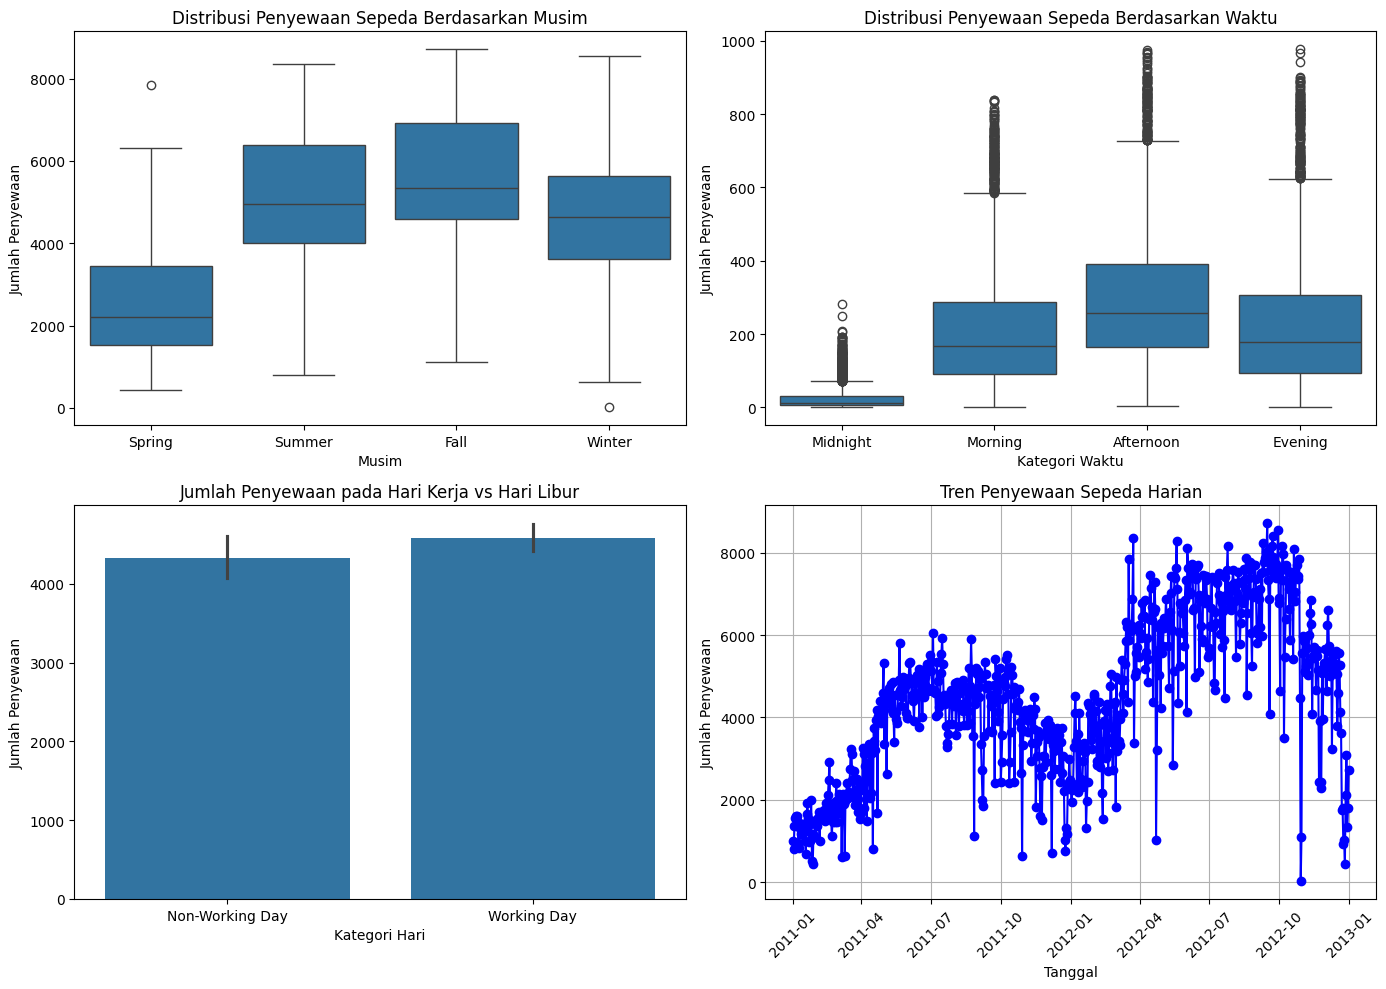

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Penyewaan Sepeda Berdasarkan Musim
sns.boxplot(ax=axes[0, 0], x="season_label", y="cnt", data=df_day)
axes[0, 0].set_title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
axes[0, 0].set_xlabel("Musim")
axes[0, 0].set_ylabel("Jumlah Penyewaan")

# Plot 2: Penyewaan Sepeda Berdasarkan Waktu
sns.boxplot(ax=axes[0, 1], x="time_category", y="cnt", data=df_hour)
axes[0, 1].set_title("Distribusi Penyewaan Sepeda Berdasarkan Waktu")
axes[0, 1].set_xlabel("Kategori Waktu")
axes[0, 1].set_ylabel("Jumlah Penyewaan")

# Plot 3: Jumlah Penyewaan pada Hari Kerja vs Hari Libur
sns.barplot(ax=axes[1, 0], x="workingday_label", y="cnt", data=df_day)
axes[1, 0].set_title("Jumlah Penyewaan pada Hari Kerja vs Hari Libur")
axes[1, 0].set_xlabel("Kategori Hari")
axes[1, 0].set_ylabel("Jumlah Penyewaan")

# Plot 4: Tren Penyewaan Sepeda Harian
axes[1, 1].plot(df_day['dteday'], df_day['cnt'], marker='o', linestyle='-', color='blue')
axes[1, 1].set_title("Tren Penyewaan Sepeda Harian")
axes[1, 1].set_xlabel("Tanggal")
axes[1, 1].set_ylabel("Jumlah Penyewaan")
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid()

plt.tight_layout()
plt.show()


# CONCLUSION

- Conclution pertanyaan 1 :
Berdasarkan boxplot yang menunjukkan pengaruh cuaca terhadap jumlah penyewaan sepeda, dapat disimpulkan bahwa kondisi cuaca memiliki pengaruh signifikan terhadap jumlah sepeda yang disewa. Cuaca yang cerah (weathersit = 1) menunjukkan jumlah penyewaan sepeda yang lebih tinggi dibandingkan dengan kondisi cuaca lainnya, seperti hujan ringan atau hujan lebat. Ini menunjukkan bahwa cuaca yang lebih baik, seperti cerah dan berawan, cenderung mendorong lebih banyak orang untuk menyewa sepeda. Sebaliknya, kondisi cuaca buruk (hujan) cenderung mengurangi minat pengguna untuk menyewa sepeda, yang terlihat dari distribusi Monetary yang lebih rendah pada cuaca hujan.

- Conclusion pertanyaan 2 : Berdasarkan barplot yang menggambarkan pola penggunaan sepeda menurut hari dalam seminggu, terlihat bahwa tingkat penyewaan sepeda cenderung lebih tinggi pada hari Minggu hingga Selasa dibandingkan dengan hari lainnya. Hal ini menunjukkan bahwa sepeda lebih sering disewa pada periode tersebut, yang kemungkinan berkaitan dengan kebutuhan transportasi menuju tempat kerja atau kegiatan rutin lainnya. Sementara itu, pada hari Rabu, Kamis, Jumat, dan Sabtu, jumlah penyewaan sepeda mengalami penurunan. Penurunan ini mungkin dipengaruhi oleh berkurangnya kebutuhan transportasi harian pada akhir pekan, atau faktor lain seperti cuaca atau kegiatan sosial yang lebih menarik di luar penggunaan sepeda.

### Analisis Lanjutan

- Musim panas (Summer) dan musim gugur (Fall) memiliki jumlah penyewaan tertinggi, sedangkan musim semi (Spring) memiliki penyewaan paling rendah. Hal ini menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak orang untuk menggunakan sepeda.

- Jumlah penyewaan meningkat pada pagi hari (Morning), siang hari (Afternoon), dan sore hari (Evening), dengan puncaknya kemungkinan pada jam sibuk perjalanan kerja. Pada tengah malam (Midnight), jumlah penyewaan sangat rendah, yang bisa dikaitkan dengan minimnya aktivitas pengguna pada jam tersebut.

- Tidak ada perbedaan signifikan antara hari kerja (Working Day) dan hari libur (Non-Working Day), meskipun jumlah penyewaan sedikit lebih tinggi pada hari kerja. Hal ini menunjukkan bahwa sepeda digunakan tidak hanya untuk rekreasi, tetapi juga untuk keperluan transportasi harian.

- Terdapat tren peningkatan jumlah penyewaan sepeda dari waktu ke waktu, dengan pola musiman yang menunjukkan puncak pada bulan-bulan tertentu. Penurunan penyewaan di beberapa periode bisa disebabkan oleh faktor cuaca atau kondisi eksternal lainnya.